## Title

## Titanic Survival Analysis - Data Cleaning & Exploratory Data Analysis

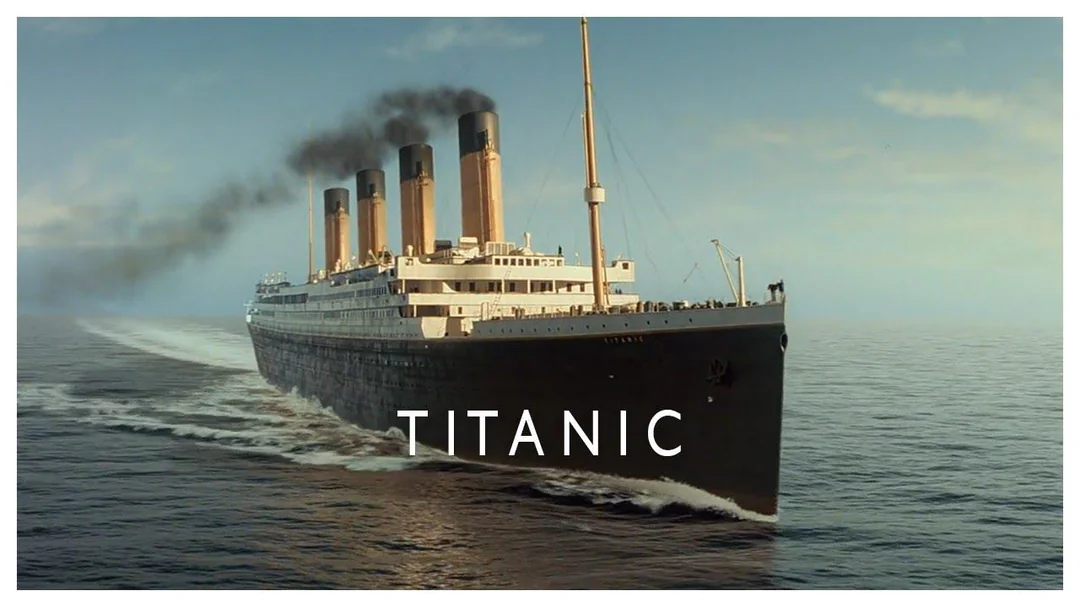

## Table of Contents

1. **Title**  
2. **Table of Contents**  
3. **Problem Statement**  
4. **Objective**  
5. **Importing Required Libraries**  
6. **Loading Titanic Training Dataset**  
7. **Data Description**  
8. **EDA (Exploratory Data Analysis)**  
   - Handling Missing Values  
   - Summary of Cleaning Strategy  
   - No Missing/Duplicates Confirmation  
9. **Data Visualization**  
   - Histograms  
   - Box Plots and Outlier Detection  
   - Pair Plots and Correlations  
   - Key Correlations and Insights  
   - Survival Influences and Family Size Correlation  
10. **Check Skewness and Kurtosis**  
11. **Data Preprocessing**  
    - Handling Missing Values  
    - Dropping Unnecessary Columns  
    - Handling Outliers  
12. **Feature Engineering**  
    - Label Encoding  
    - Feature Scaling  
13. **Data Splitting**  
14. **Reloading Titanic Training Dataset**  
15. **EDA and Data Preprocessing Summary**  
16. **Feature Engineering **  
    - Label Encoding  
    - Feature Scaling  
17. **Loading `gender_submission.csv`**  
18. **Model Training Using GradientBoostingClassifier**  
19. **Confusion Matrix**  
20. **Feature Importances from GradientBoostingClassifier**  
21. **Result**  
      
22. **Conclusion**  
   


## Problem Statement
#### The Titanic disaster resulted in the loss of many lives. Using passenger data, the goal is to understand what factors influenced survival, such as age, gender, and class.



## Objective
#### To clean the Titanic dataset, handle missing values, and perform exploratory data analysis (EDA) to identify patterns and key factors that affected survival.

## Importing Required Libraries

In [1]:
# Importing Required Libraries
# Libraries for data handling, visualization, and warnings

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Loading Titanic training dataset

In [3]:
# Loading Titanic training dataset
train_df = pd.read_csv('train.csv')

In [4]:
# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
train_df.head()

First few rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Display the last few rows of the dataset
print("Last few rows of the dataset:")
train_df.tail()

Last few rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


##  Data Description

In [6]:
# Display the size of the dataset (number of rows and columns)
print("Dataset size:")
print(train_df.shape)

Dataset size:
(891, 12)


The train dataset contains 891 rows and 12 columns.

## EDA (Exploratory Data Analysis)

In [7]:
# Display the column names of the dataset
columns = train_df.columns
print("Columns in the dataset:",columns)

Columns in the dataset: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [8]:
# Selecting all numerical column names (both float and int types)
numerical_features = train_df.select_dtypes(include=['float64', 'int64']).columns
print(numerical_features)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [9]:
# Display the Categorical column names of the dataset
categorical_features= train_df.select_dtypes(include=['object']).columns
print(categorical_features)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [10]:
# Get a summary of the dataset
print("Summary of the dataset:")
train_df.info()

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# Display statistical summary for all columns within the dataFram
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [12]:
# Describe the numerical features
print("Statistical description of numerical features:")
train_df.describe()

Statistical description of numerical features:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# Describe the categorical features
print("Statistical description of categorical features:")
train_df[categorical_features].describe()

Statistical description of categorical features:


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [14]:
# Check for Null Values 
print("Checking for missing values:")
print(train_df.isnull().sum())

Checking for missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [15]:
# Percentage of missing values in each column
train_df.isnull().sum()/train_df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

###### Missing values are handled based on their percentage. Rows with less than 3% missing values are dropped (dropna()), while columns with 3% to 40% missing values are filled using appropriate methods (fillna()). Columns with over 40% missing values are entirely dropped to maintain data quality. This approach ensures a balanced trade-off between data retention and accuracy.

In [16]:
# Check for Null Duplicates
print("Checking for duplicate records:")
print(train_df.duplicated().sum())

Checking for duplicate records:
0


###### There are no missing values or duplicates in the dataset.We can shift our focus to other critical aspects of data preprocessing and analysis, including handling unnecessary columns, detecting and treating outliers, and addressing skewness and kurtosis.

### Data Visualization

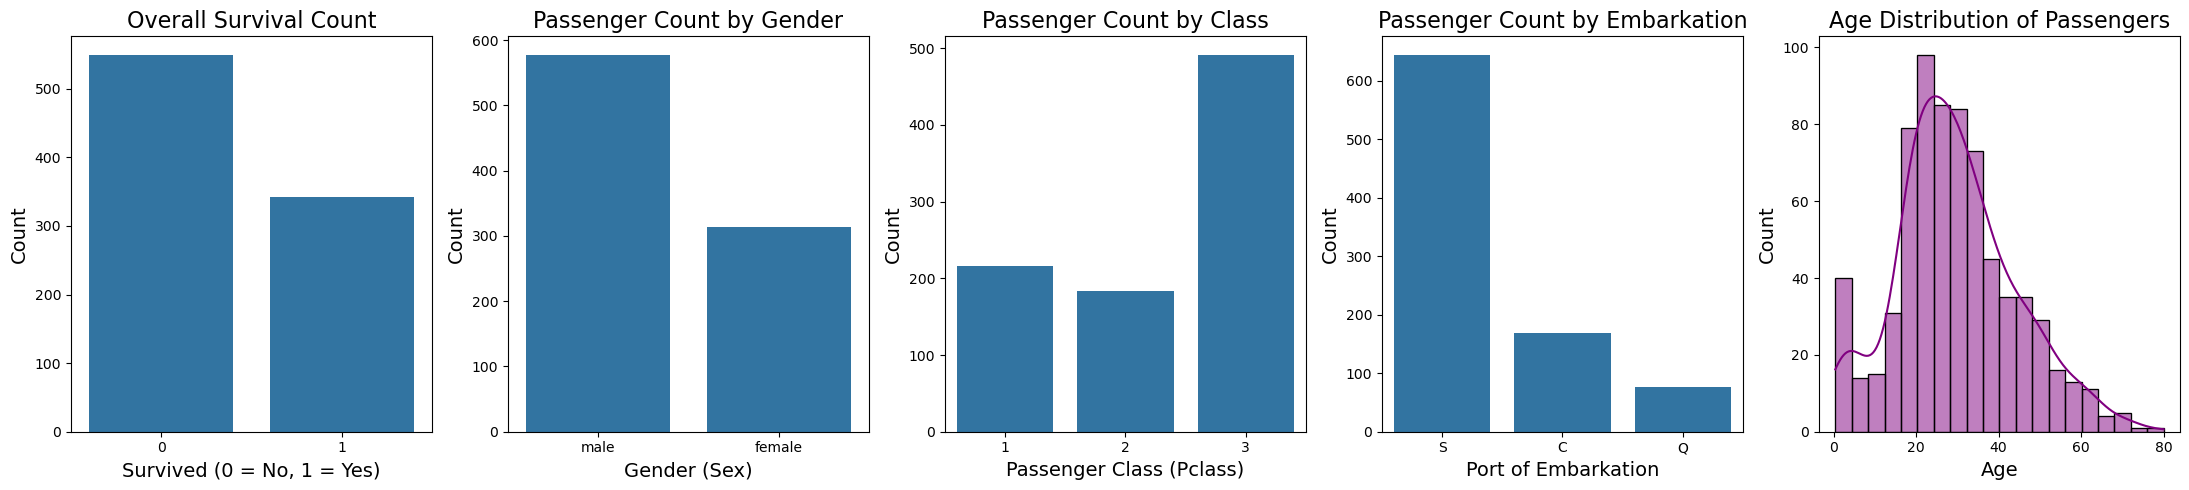

In [17]:
# Setting the figure size for the subplot layout (5 panels)
plt.figure(figsize=(22, 5))

# Subplot 1: Bar Chart for 'Pclass'
plt.subplot(1, 5, 1)
sns.countplot(data=train_df, x='Survived')
plt.title('Overall Survival Count', fontsize=16)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Subplot 2: Bar Chart for 'Sex'
plt.subplot(1, 5, 2)
sns.countplot(data=train_df, x='Sex')
plt.title('Passenger Count by Gender', fontsize=16)
plt.xlabel('Gender (Sex)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Subplot 3: Overall Survival Count
plt.subplot(1, 5, 3)
sns.countplot(data=train_df, x='Pclass')
plt.title('Passenger Count by Class', fontsize=16)
plt.xlabel('Passenger Class (Pclass)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Subplot 4: Bar Chart for 'Embarked'
plt.subplot(1, 5, 4)
sns.countplot(data=train_df, x='Embarked')
plt.title('Passenger Count by Embarkation', fontsize=16)
plt.xlabel('Port of Embarkation', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Subplot 5: Histogram for 'Age'
plt.subplot(1, 5, 5)
sns.histplot(data=train_df, x='Age', bins=20, kde=True, color='purple')
plt.title('Age Distribution of Passengers', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adjusting the layout for clarity
plt.tight_layout()
plt.show()

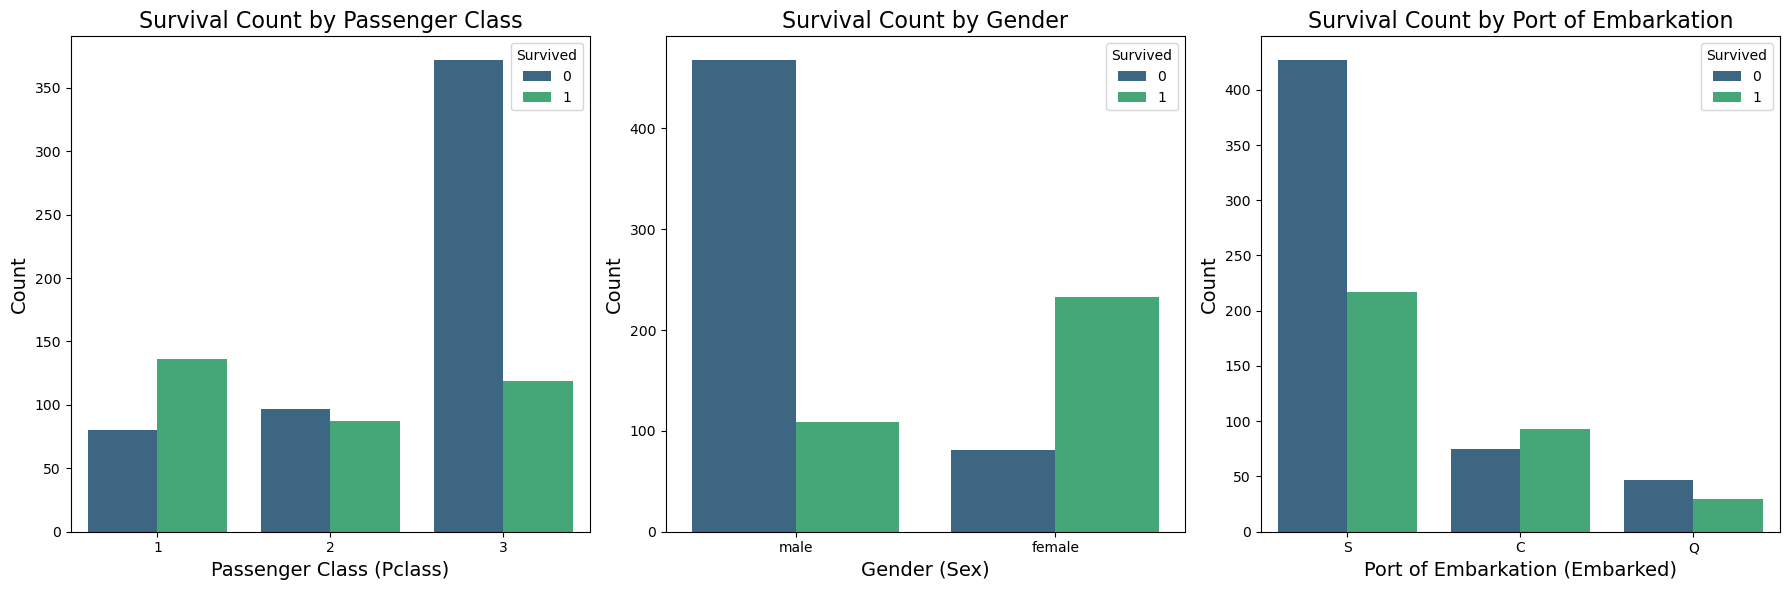

In [18]:
# Setting the figure size for the subplot layout (3 panels)
plt.figure(figsize=(18, 6))

# Subplot 1: Survival Count by Passenger Class (Pclass)
plt.subplot(1, 3, 1)
sns.countplot(data=train_df, x='Pclass', hue='Survived', palette='viridis')
plt.title('Survival Count by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class (Pclass)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Survived', loc='upper right')

# Subplot 2: Survival Count by Gender (Sex)
plt.subplot(1, 3, 2)
sns.countplot(data=train_df, x='Sex', hue='Survived', palette='viridis')
plt.title('Survival Count by Gender', fontsize=16)
plt.xlabel('Gender (Sex)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Survived', loc='upper right')

# Subplot 3: Survival Count by Port of Embarkation (Embarked)
plt.subplot(1, 3, 3)
sns.countplot(data=train_df, x='Embarked', hue='Survived', palette='viridis')
plt.title('Survival Count by Port of Embarkation', fontsize=16)
plt.xlabel('Port of Embarkation (Embarked)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Survived', loc='upper right')

# Adjusting the layout for clarity
plt.tight_layout()
plt.show()


<Figure size 2000x1000 with 0 Axes>

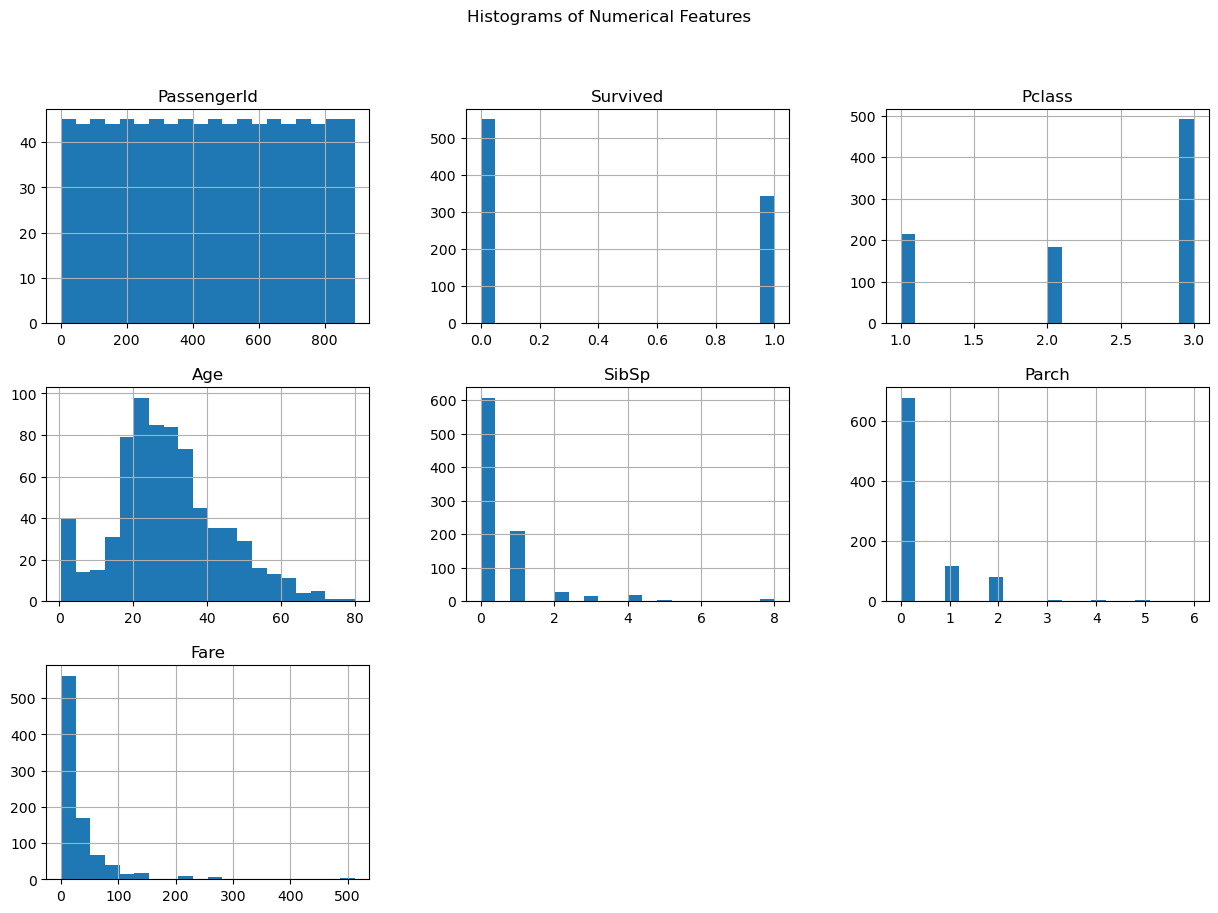

In [19]:
# Histograms for numerical features
plt.figure(figsize=(20, 10))
train_df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

###### Histograms are essential visual tools in data analysis for understanding how numerical data is distributed across different intervals or bins. They provide insights into the central tendency and spread of each feature, helping to identify patterns such as skewness

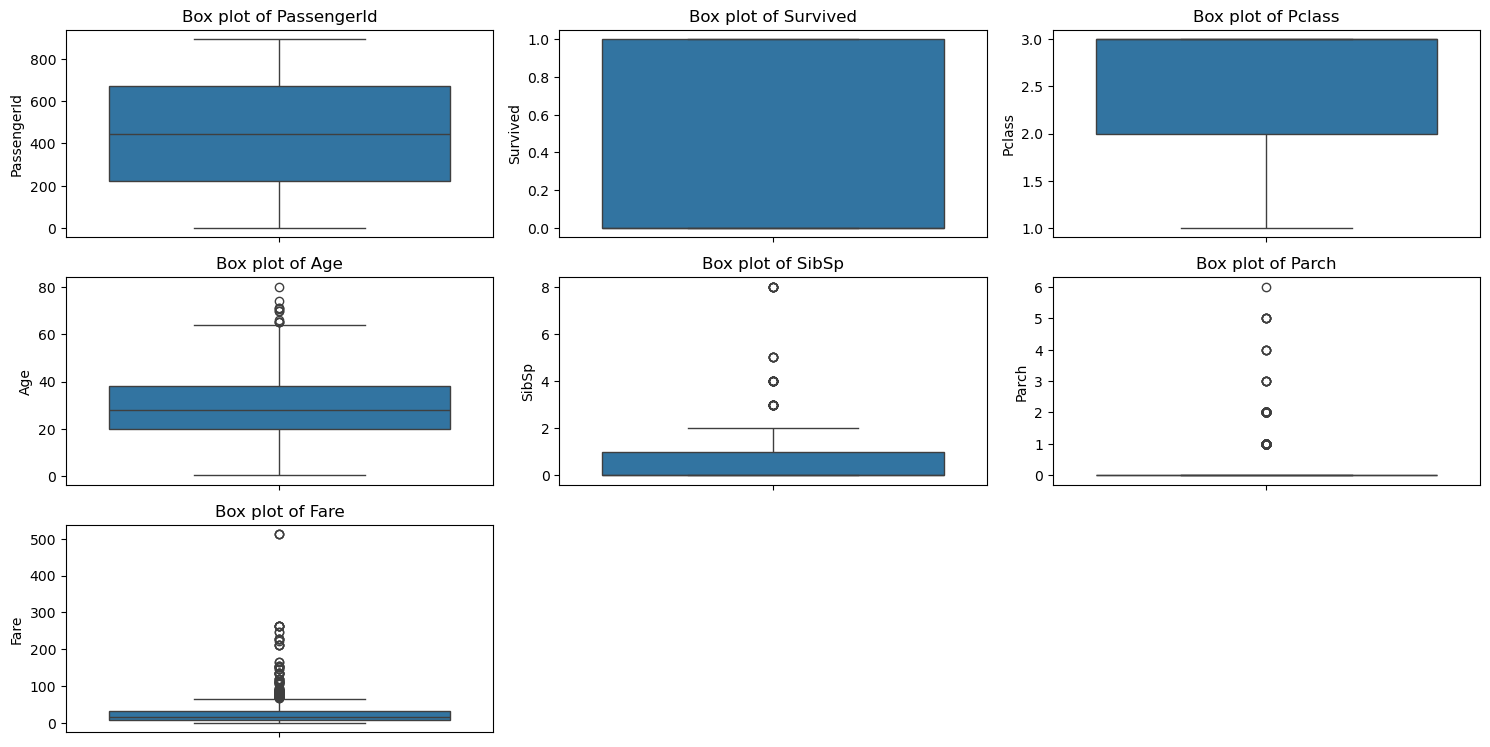

In [20]:
# Box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(4, 3, i+1)
    sns.boxplot(train_df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

###### Box plots are essential for detecting outliers in numerical data. In the Titanic dataset, the SibSp (Sibling/Spouse) and Parch (Parent/Child) columns show clear outliers. These outliers indicate that a few passengers have an unusually high number of siblings/spouses or parents/children aboard, which is uncommon. Identifying these outliers helps in understanding data distribution and making informed preprocessing decisions.In the Fare column, outliers reflect passengers who paid exceptionally high fares, likely representing luxury cabins in First Class.

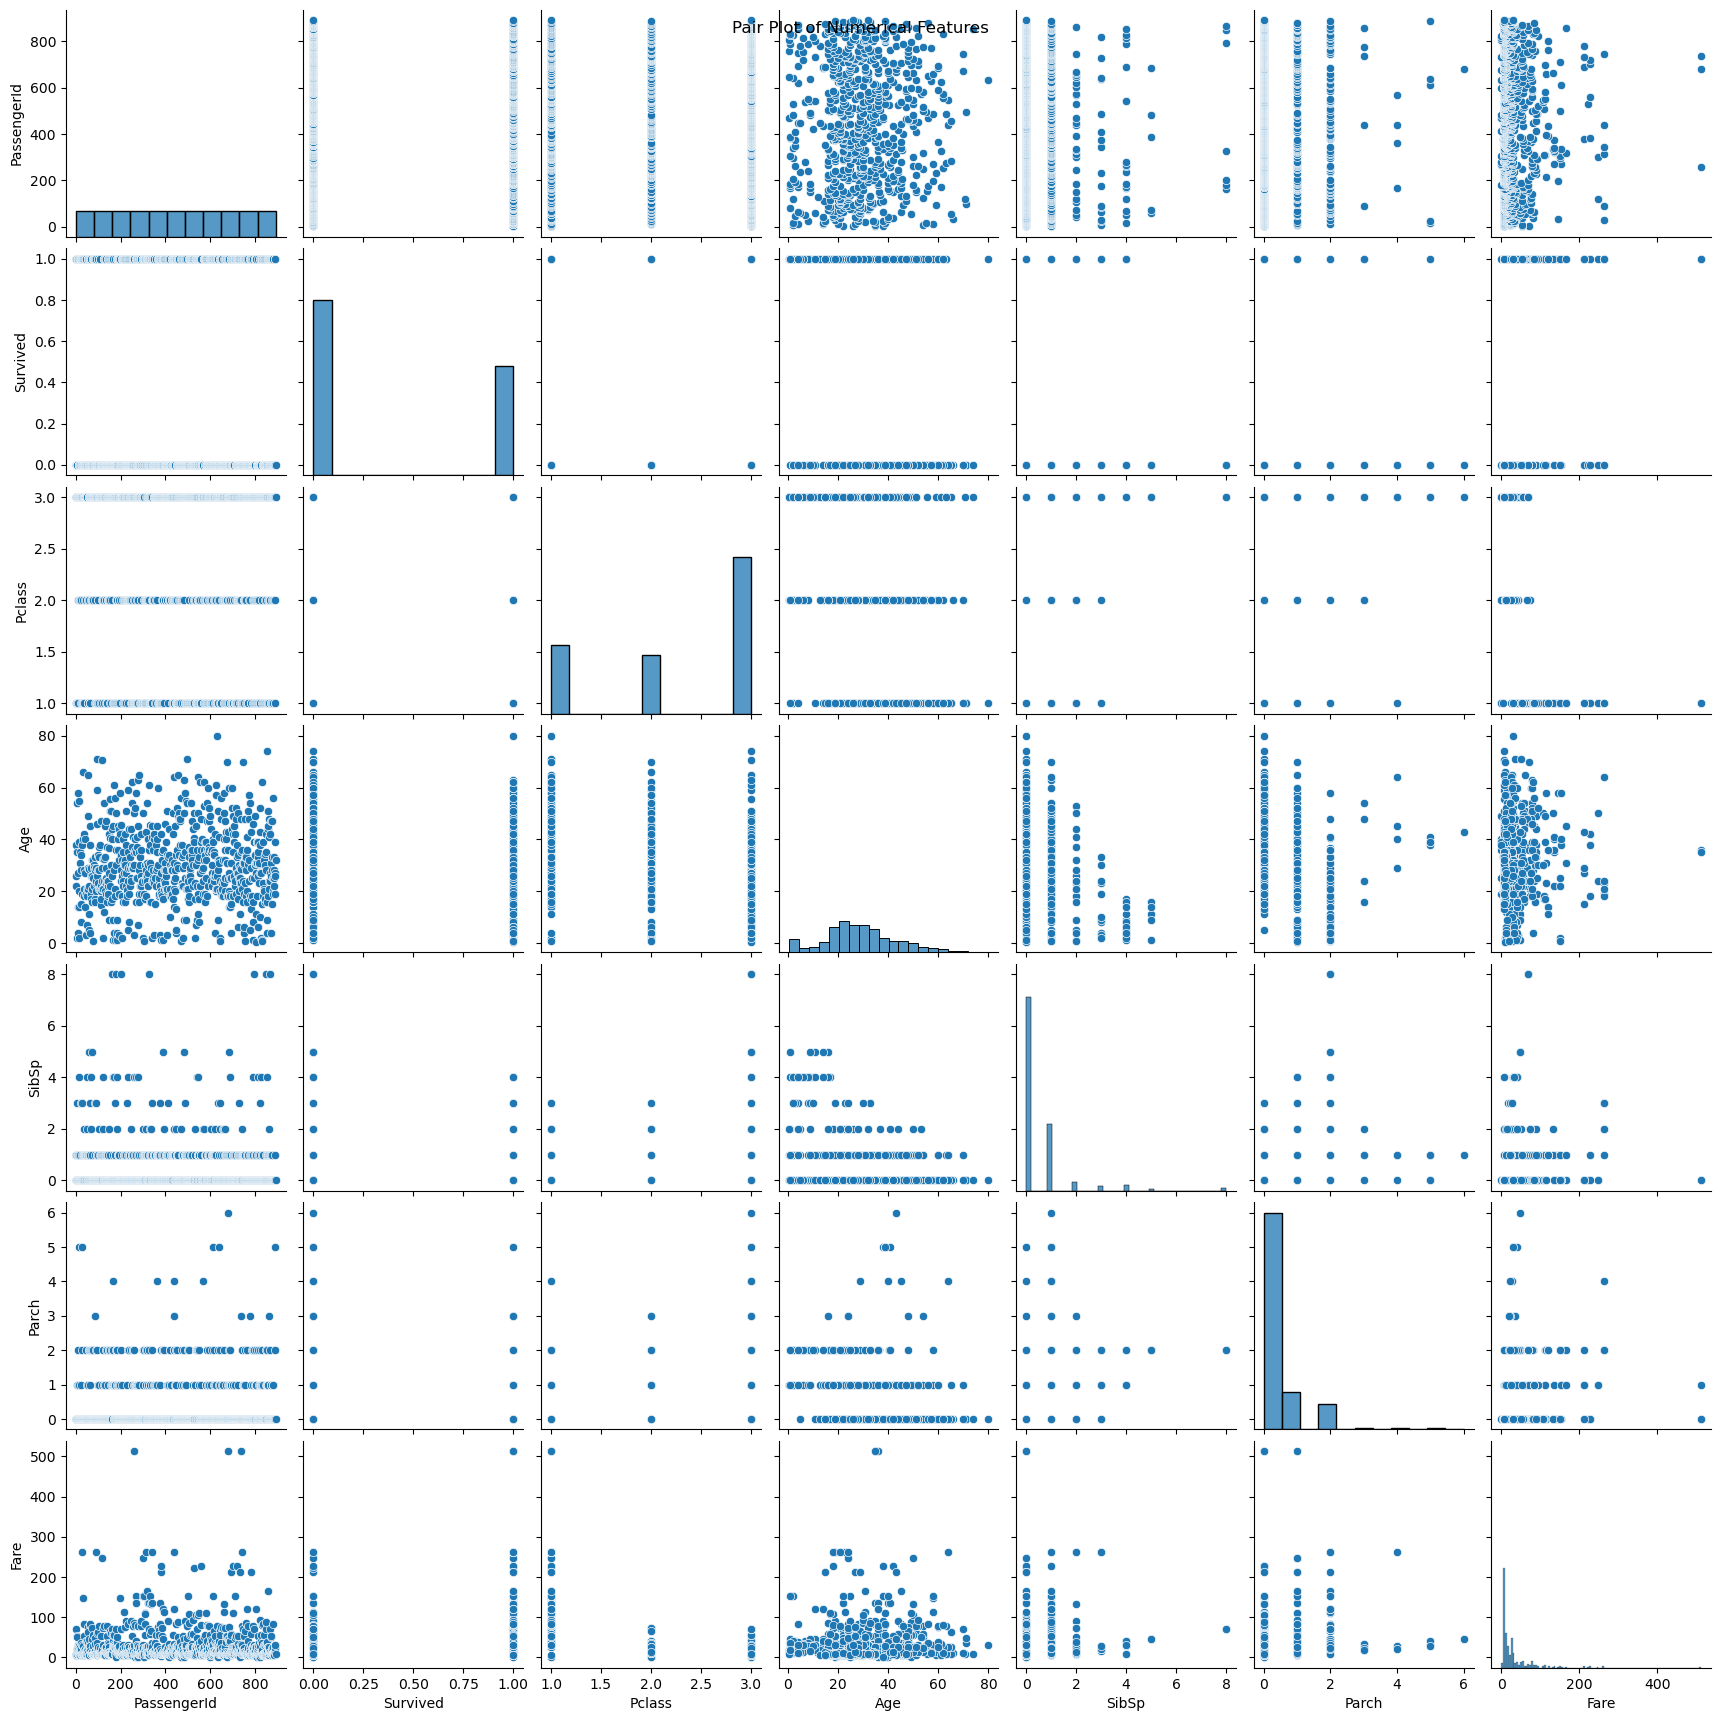

In [21]:
# Scatter plot matrix
sns.pairplot(train_df[numerical_features])
plt.suptitle('Pair Plot of Numerical Features')
plt.show()

###### Pair plots are used to visualize pairwise relationships between numerical variables in a dataset. They help identify patterns, trends, and potential correlations between variables,, providing valuable insights for further exploration and analysis.

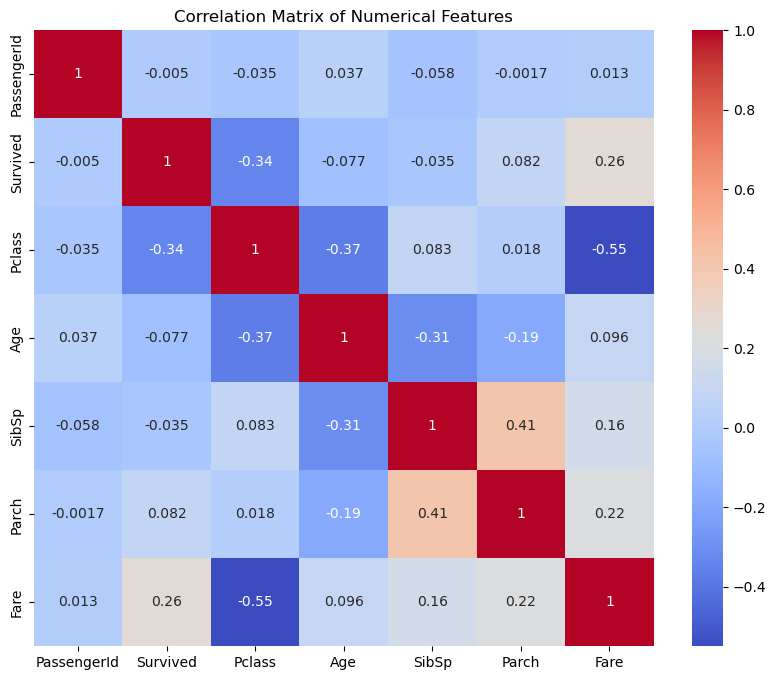

In [22]:
# Correlation matrix
corr_matrix = train_df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


###### The strongest relationship is between 'Pclass' and 'Fare' (-0.55), highlighting that class and fare are closely related.

###### The survival rate is more strongly influenced by 'Pclass' and 'Fare' than by 'Age' or family size (SibSp, Parch).

###### Family size features (SibSp and Parch) are positively correlated, indicating that they often overlap.

##### Check Skewness and Kurtosis

In [23]:
#Check Skewness and Kurtosis
from scipy.stats import skew, kurtosis
# Calculate skewness and kurtosis
skewness = train_df[numerical_features].apply(skew)
kurt = train_df[numerical_features].apply(lambda x: kurtosis(x, fisher=False))

print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurt)

# Identify positive and negative skewness (absolute value > 1)
positive_skewness = skewness[skewness > 1]
negative_skewness = skewness[skewness < -1]

print('\nVariables with Positive Skewness (skew > 1):\n', positive_skewness)
print('\nVariables with Negative Skewness (skew < -1):\n', negative_skewness)

# Identify platykurtic (kurtosis < 3) and leptokurtic (kurtosis > 3) distributions
platykurtic = kurt[kurt < 3]
leptokurtic = kurt[kurt > 3]

print('\nVariables with Platykurtic Distribution (kurtosis < 3):\n', platykurtic)
print('\nVariables with Leptokurtic Distribution (kurtosis > 3):\n', leptokurtic)


Skewness:
 PassengerId    0.000000
Survived       0.477717
Pclass        -0.629486
Age                 NaN
SibSp          3.689128
Parch          2.744487
Fare           4.779253
dtype: float64

Kurtosis:
 PassengerId     1.799997
Survived        1.228214
Pclass          1.720430
Age                  NaN
SibSp          20.773512
Parch          12.716613
Fare           36.204289
dtype: float64

Variables with Positive Skewness (skew > 1):
 SibSp    3.689128
Parch    2.744487
Fare     4.779253
dtype: float64

Variables with Negative Skewness (skew < -1):
 Series([], dtype: float64)

Variables with Platykurtic Distribution (kurtosis < 3):
 PassengerId    1.799997
Survived       1.228214
Pclass         1.720430
dtype: float64

Variables with Leptokurtic Distribution (kurtosis > 3):
 SibSp    20.773512
Parch    12.716613
Fare     36.204289
dtype: float64


##  Data Preprocessing


In [24]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Handling Missing Values:

In [25]:
#filling null value with mean
# Calculating the Mean of Age
age_mean = train_df['Age'].mean()

# Imputing Missing Values in Age with Mean
train_df['Age'].fillna(age_mean, inplace=True)

In [26]:
# Dropping the 'Cabin' column due to high number of missing values
train_df.drop('Cabin', axis=1, inplace=True)

In [27]:
# Removing all rows with any missing (NaN) values
train_df.dropna(inplace=True)

In [28]:
# Resetting the index after dropping rows to maintain a clean, sequential index
train_df.reset_index(drop=True, inplace=True)

# Verifying the shape of the DataFrame after index reset
print("\nDataFrame Shape After Resetting Index:", train_df.shape)

# Displaying the updated DataFrame
train_df



DataFrame Shape After Resetting Index: (889, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
885,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
887,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [29]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

##### Handling unnecessary columns

In [30]:

# Dropping unnecessary columns that are not useful for model training
# 'PassengerId': A unique identifier for each passenger (not informative for predictions)
# 'Name': A textual field that does not provide useful information for model training
# 'Ticket': Another textual field (ticket number) which is not useful for prediction

train_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [31]:
# View first few rows
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [32]:
# Selecting all numerical columns (both float and int types)
numerical_features = train_df.select_dtypes(include=['float64', 'int64']).columns
print(numerical_features)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [33]:
# Selecting all Categorical columns
categorical_features=train_df.select_dtypes(include=['object',]).columns
print(categorical_features)

Index(['Sex', 'Embarked'], dtype='object')


##### Handing Outliers

In [34]:
import numpy as np

# Defining a function to calculate the Interquartile Range (IQR) and whisker boundaries for outlier detection
def whisker(col):
    # Calculate the 25th percentile (Q1) and 75th percentile (Q3)
    q1, q3 = np.percentile(col, [25, 75])
    
    # Compute the Interquartile Range (IQR)
    iqr = q3 - q1
    
    # Calculate lower whisker (Q1 - 1.5 * IQR) and upper whisker (Q3 + 1.5 * IQR)
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    
    # Return the whisker boundaries
    return lw, uw


In [35]:
# List of columns to apply outlier treatment using IQR method
outlier_columns = ['Age', 'SibSp', 'Parch', 'Fare']

# Applying outlier capping using the whisker function for each specified column
for col in outlier_columns:
    # Calculate lower and upper whisker boundaries
    lw, uw = whisker(train_df[col])
    
    # Cap values below the lower whisker to the lower whisker value
    train_df[col] = np.where(train_df[col] < lw, lw, train_df[col])
    
    # Cap values above the upper whisker to the upper whisker value
    train_df[col] = np.where(train_df[col] > uw, uw, train_df[col])


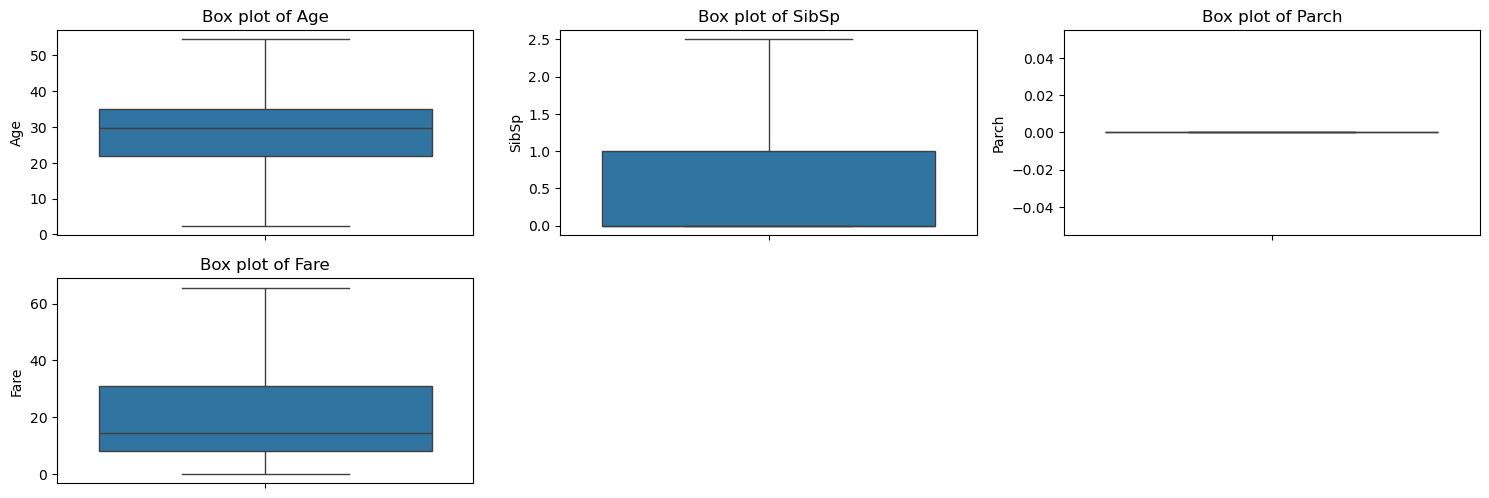

In [36]:
# Box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(outlier_columns):
    plt.subplot(4, 3, i+1)
    sns.boxplot(train_df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

In [37]:
#Check Skewness and Kurtosis
from scipy.stats import skew, kurtosis
# Calculate skewness and kurtosis
skewness = train_df[numerical_features].apply(skew)
kurt = train_df[numerical_features].apply(lambda x: kurtosis(x, fisher=False))

print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurt)

# Identify positive and negative skewness (absolute value > 1)
positive_skewness = skewness[skewness > 1]
negative_skewness = skewness[skewness < -1]

print('\nVariables with Positive Skewness (skew > 1):\n', positive_skewness)
print('\nVariables with Negative Skewness (skew < -1):\n', negative_skewness)

# Identify platykurtic (kurtosis < 3) and leptokurtic (kurtosis > 3) distributions
platykurtic = kurt[kurt < 3]
leptokurtic = kurt[kurt > 3]

print('\nVariables with Platykurtic Distribution (kurtosis < 3):\n', platykurtic)
print('\nVariables with Leptokurtic Distribution (kurtosis > 3):\n', leptokurtic)


Skewness:
 Survived    0.483750
Pclass     -0.635922
Age         0.080101
SibSp       1.615016
Parch            NaN
Fare        1.089436
dtype: float64

Kurtosis:
 Survived    1.234014
Pclass      1.730949
Age         3.125228
SibSp       4.747822
Parch            NaN
Fare        2.773083
dtype: float64

Variables with Positive Skewness (skew > 1):
 SibSp    1.615016
Fare     1.089436
dtype: float64

Variables with Negative Skewness (skew < -1):
 Series([], dtype: float64)

Variables with Platykurtic Distribution (kurtosis < 3):
 Survived    1.234014
Pclass      1.730949
Fare        2.773083
dtype: float64

Variables with Leptokurtic Distribution (kurtosis > 3):
 Age      3.125228
SibSp    4.747822
dtype: float64


<Figure size 2000x1000 with 0 Axes>

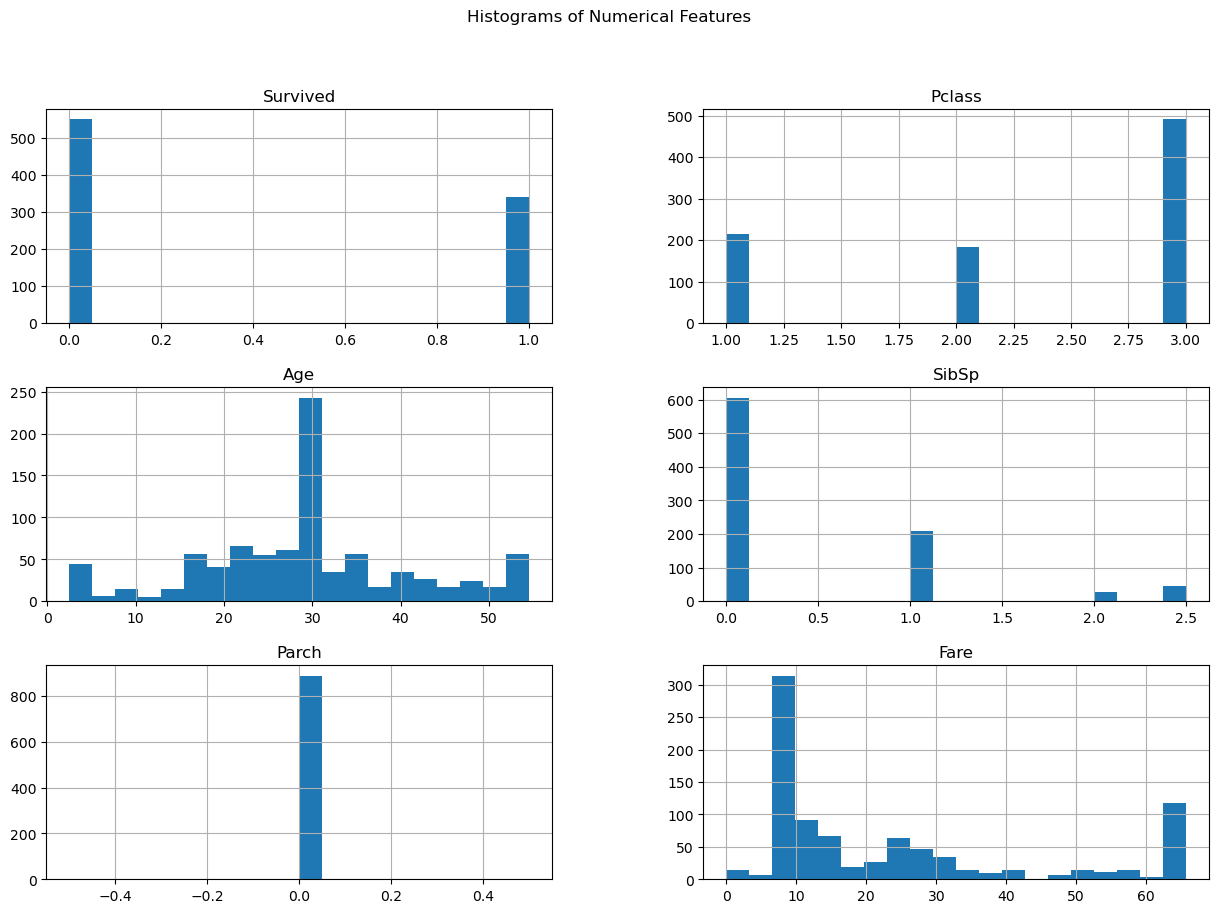

In [38]:
# Histograms for numerical features
plt.figure(figsize=(20, 10))
train_df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

## Feature Engineering


##### Label Encoding

In [39]:
# Import the LabelEncoder class from the preprocessing module of scikit-learn
from sklearn.preprocessing import LabelEncoder

# Encode categorical features 
for feature in categorical_features:
    label_encoder  = LabelEncoder()
    train_df[feature] =label_encoder .fit_transform(train_df[feature])
train_df



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1.0,0.0,7.2500,2
1,1,1,0,38.000000,1.0,0.0,65.6563,0
2,1,3,0,26.000000,0.0,0.0,7.9250,2
3,1,1,0,35.000000,1.0,0.0,53.1000,2
4,0,3,1,35.000000,0.0,0.0,8.0500,2
...,...,...,...,...,...,...,...,...
884,0,2,1,27.000000,0.0,0.0,13.0000,2
885,1,1,0,19.000000,0.0,0.0,30.0000,2
886,0,3,0,29.699118,1.0,0.0,23.4500,2
887,1,1,1,26.000000,0.0,0.0,30.0000,0


##### Feature Scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Selecting the Numerical Columns for Scaling
#columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
columns = ['Age','Fare']

# Creating a MinMaxScaler Object (Scaling between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))

# Fitting and Transforming the Data (MinMax Scaling)
df_scaled = scaler.fit_transform(train_df[columns])

# Converting Scaled Data Back to DataFrame
scaled_df = pd.DataFrame(df_scaled, columns=columns)

# Replacing the Original Columns with Scaled Values
train_df[columns] = scaled_df

# Displaying the Scaled DataFrame
train_df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.375000,1.0,0.0,0.110424,2
1,1,1,0,0.682692,1.0,0.0,1.000000,0
2,1,3,0,0.451923,0.0,0.0,0.120704,2
3,1,1,0,0.625000,1.0,0.0,0.808757,2
4,0,3,1,0.625000,0.0,0.0,0.122608,2
...,...,...,...,...,...,...,...,...
884,0,2,1,0.471154,0.0,0.0,0.198001,2
885,1,1,0,0.317308,0.0,0.0,0.456925,2
886,0,3,0,0.523060,1.0,0.0,0.357163,2
887,1,1,1,0.451923,0.0,0.0,0.456925,0


##  Data Splitting

In [41]:
# Split dataset into features and target variable
x_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']

In [42]:
#Input features
x_train 

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.375000,1.0,0.0,0.110424,2
1,1,0,0.682692,1.0,0.0,1.000000,0
2,3,0,0.451923,0.0,0.0,0.120704,2
3,1,0,0.625000,1.0,0.0,0.808757,2
4,3,1,0.625000,0.0,0.0,0.122608,2
...,...,...,...,...,...,...,...
884,2,1,0.471154,0.0,0.0,0.198001,2
885,1,0,0.317308,0.0,0.0,0.456925,2
886,3,0,0.523060,1.0,0.0,0.357163,2
887,1,1,0.451923,0.0,0.0,0.456925,0


In [43]:
# Target variable
y_train

0      0
1      1
2      1
3      1
4      0
      ..
884    0
885    1
886    0
887    1
888    0
Name: Survived, Length: 889, dtype: int64

## Loading the Titanic training dataset

In [44]:
# Loading the Titanic training dataset
test_df = pd.read_csv('test.csv')

In [45]:
# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
test_df.head()

First few rows of the dataset:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
# Display the last few rows of the dataset
print("Last few rows of the dataset:")
test_df.tail()

Last few rows of the dataset:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [47]:
# Display the size of the dataset (number of rows and columns)
print("Dataset size:")
print(test_df.shape)

Dataset size:
(418, 11)


## Exploratory Data Analysis (EDA) and Data Preprocessing on the Titanic train.csv dataset 

In [48]:
# Display column names of the dataset
columns =test_df.columns
print("Columns in the dataset:",columns)

Columns in the dataset: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [49]:
# Selecting all numerical columns (both float and int types)
numerical_features = test_df.select_dtypes(include=['float64', 'int64']).columns
print(numerical_features)

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [50]:
# Selecting all Categorical columns
categorical_features=test_df.select_dtypes(include=['object']).columns
print(categorical_features)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [51]:
# Get a summary of the dataset
print("Summary of the dataset:")
test_df.info()

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [52]:
# Describe the numerical features
print("Statistical description of numerical features:")
test_df.describe()

Statistical description of numerical features:


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [53]:
# Check for Null Values 
print("Checking for missing values:")
print(test_df.isnull().sum())

Checking for missing values:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [54]:
# Check for Null Duplicates
print("Checking for duplicate records:")
print(test_df.duplicated().sum())

Checking for duplicate records:
0


In [55]:
#filling null value with mean
# Calculating the Mean of Age (excluding missing values)
age_mean =test_df['Age'].mean()

# Imputing Missing Values in Age with Mean
test_df['Age'].fillna(age_mean, inplace=True)

In [56]:
# Filling Missing Values in Fare with Mean
fare_mean = test_df['Fare'].mean()
test_df['Fare'].fillna(fare_mean, inplace=True)

In [57]:
# Dropping the 'Cabin' column from the test dataset due to a high number of missing values
test_df.drop('Cabin', axis=1, inplace=True)


In [58]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [59]:
# Dropping unnecessary columns that are not useful for model training
# 'PassengerId': A unique identifier for each passenger (not informative for predictions)
# 'Name': A textual field that does not provide useful information for model training
# 'Ticket': Another textual field (ticket number) which is not useful for prediction

test_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [60]:
# Display Numerical column names
numerical_features =test_df.select_dtypes(include='int').columns
print(numerical_features)

Index(['Pclass', 'SibSp', 'Parch'], dtype='object')


In [61]:
# Display Categorical column names
categorical_features=test_df.select_dtypes(include=['object','datetime']).columns
print(categorical_features)

Index(['Sex', 'Embarked'], dtype='object')


In [62]:
import numpy as np

# Defining the function to calculate IQR (Interquartile Range) and Whiskers
def whisker(col):
    q1, q3 = np.percentile(col, [25, 75])  
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr  # Lower whisker
    uw = q3 + 1.5 * iqr  # Upper whisker
    return lw, uw

In [63]:
# List of columns for outlier treatment
outlier_columns =  ['Age', 'SibSp', 'Parch', 'Fare']

# Applying IQR outlier treatment to the specified columns only
for col in outlier_columns:
    lw, uw = whisker(test_df[col])  # Calculating IQR for the column
    test_df[col] = np.where(test_df[col] < lw, lw, test_df[col])
    test_df[col] = np.where(test_df[col] > uw, uw,test_df[col])


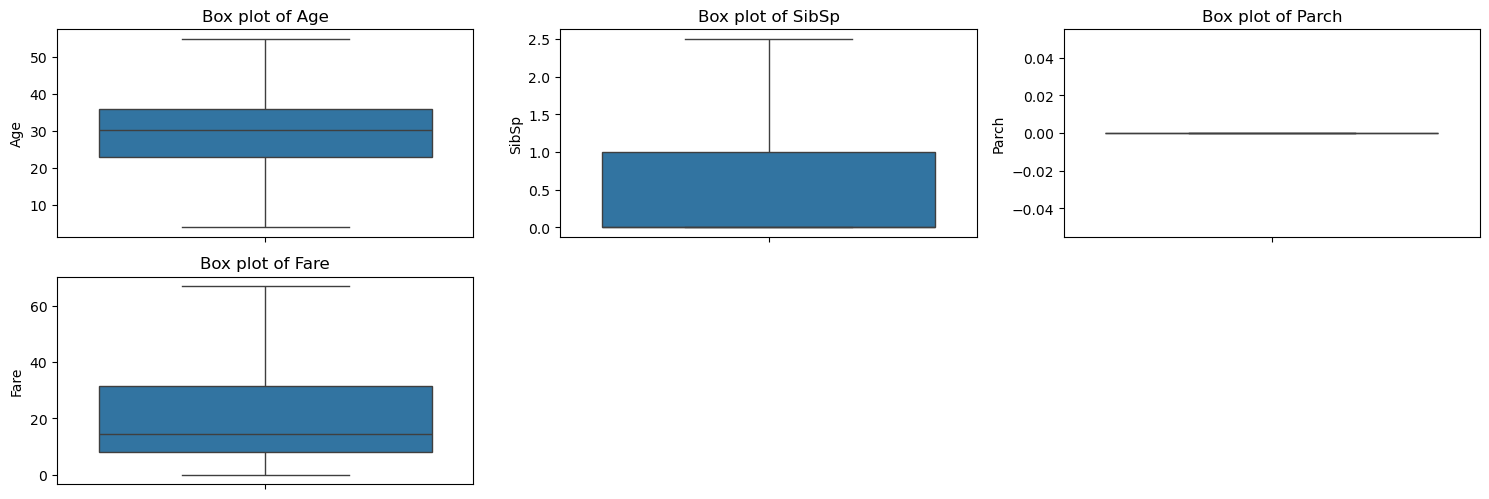

In [64]:
# Box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(outlier_columns):
    plt.subplot(4, 3, i+1)
    sns.boxplot(test_df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

In [65]:
#Check Skewness and Kurtosis
from scipy.stats import skew, kurtosis
# Calculate skewness and kurtosis
skewness = test_df[numerical_features].apply(skew)
kurt = train_df[numerical_features].apply(lambda x: kurtosis(x, fisher=False))

print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurt)

# Identify positive and negative skewness (absolute value > 1)
positive_skewness = skewness[skewness > 1]
negative_skewness = skewness[skewness < -1]

print('\nVariables with Positive Skewness (skew > 1):\n', positive_skewness)
print('\nVariables with Negative Skewness (skew < -1):\n', negative_skewness)

# Identify platykurtic (kurtosis < 3) and leptokurtic (kurtosis > 3) distributions
platykurtic = kurt[kurt < 3]
leptokurtic = kurt[kurt > 3]

print('\nVariables with Platykurtic Distribution (kurtosis < 3):\n', platykurtic)
print('\nVariables with Leptokurtic Distribution (kurtosis > 3):\n', leptokurtic)


Skewness:
 Pclass   -0.532252
SibSp     1.550341
Parch          NaN
dtype: float64

Kurtosis:
 Pclass    1.730949
SibSp     4.747822
Parch          NaN
dtype: float64

Variables with Positive Skewness (skew > 1):
 SibSp    1.550341
dtype: float64

Variables with Negative Skewness (skew < -1):
 Series([], dtype: float64)

Variables with Platykurtic Distribution (kurtosis < 3):
 Pclass    1.730949
dtype: float64

Variables with Leptokurtic Distribution (kurtosis > 3):
 SibSp    4.747822
dtype: float64


## Feature Engineering

##### Label Encoding

In [66]:
# Import the LabelEncoder class from the preprocessing module of scikit-learn
from sklearn.preprocessing import LabelEncoder

# Encode categorical features 
for feature in categorical_features:
    label_encoder  = LabelEncoder()
    test_df[feature] =label_encoder .fit_transform(test_df[feature])
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0.0,0.0,7.8292,1
1,3,0,47.00000,1.0,0.0,7.0000,2
2,2,1,54.87500,0.0,0.0,9.6875,1
3,3,1,27.00000,0.0,0.0,8.6625,2
4,3,0,22.00000,1.0,0.0,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0.0,0.0,8.0500,2
414,1,0,39.00000,0.0,0.0,66.9063,0
415,3,1,38.50000,0.0,0.0,7.2500,2
416,3,1,30.27259,0.0,0.0,8.0500,2


##### Feature Scaling

In [67]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Selecting the Numerical Columns for Scaling
#columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
columns = ['Age', 'Fare']

# Creating a MinMaxScaler Object (Scaling between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))

# Fitting and Transforming the Data (MinMax Scaling)
df_scaled = scaler.fit_transform(test_df[columns])

# Converting Scaled Data Back to DataFrame
scaled_df = pd.DataFrame(df_scaled, columns=columns)

# Replacing the Original Columns with Scaled Values
test_df[columns] = scaled_df

# Displaying the Scaled Test DataFrame
test_df


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.600490,0.0,0.0,0.117017,1
1,3,0,0.845588,1.0,0.0,0.104624,2
2,2,1,1.000000,0.0,0.0,0.144792,1
3,3,1,0.453431,0.0,0.0,0.129472,2
4,3,0,0.355392,1.0,0.0,0.183652,2
...,...,...,...,...,...,...,...
413,3,1,0.517600,0.0,0.0,0.120318,2
414,1,0,0.688725,0.0,0.0,1.000000,0
415,3,1,0.678922,0.0,0.0,0.108360,2
416,3,1,0.517600,0.0,0.0,0.120318,2


In [68]:
# Assigning the preprocessed test dataset to x_test for model prediction
x_test = test_df


## load the gender_submission.csv

In [69]:
#Load the Titanic Datasets Gender Submission
gender_submission_df = pd.read_csv('gender_submission.csv')
gender_submission_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [70]:
y_test=gender_submission_df.drop('PassengerId',axis=1)
y_test

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


## Model training using GradientBoostingClassifier

In [71]:
# Gradient Boosting fitting and prediction
# Import the GradientBoostingClassifier class
from sklearn.ensemble import GradientBoostingClassifier

# Creating the Gradient Boosting model object
GB_model = GradientBoostingClassifier()

# Fitting the model on the training data
GB_model.fit(x_train, y_train)

# Training accuracy
print("Training accuracy:", GB_model.score(x_train, y_train))

# Prediction on test data
GB_model_pred = GB_model.predict(x_test)

# Test accuracy
print("Test accuracy:", GB_model.score(x_test, y_test))


Training accuracy: 0.8942632170978627
Test accuracy: 0.8708133971291866


In [72]:
GB_model_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Confusion Matrix

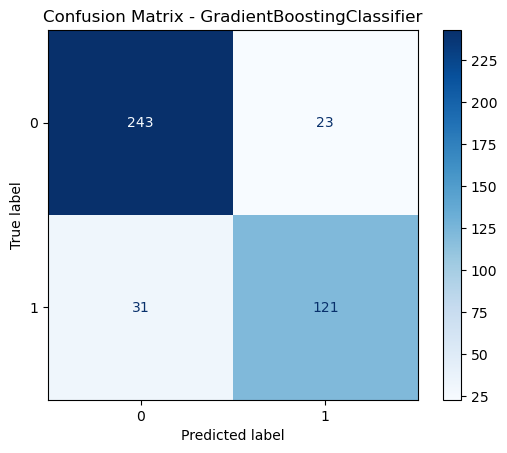

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions on the test set
y_pred = GB_model.predict(x_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GB_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - GradientBoostingClassifier")
plt.show()


## Feature Importances from GradientBoostingClassifier

Top Important Features:
  Feature  Importance
1     Sex    0.471574
5    Fare    0.175850
0  Pclass    0.147677
2     Age    0.127369
3   SibSp    0.055328


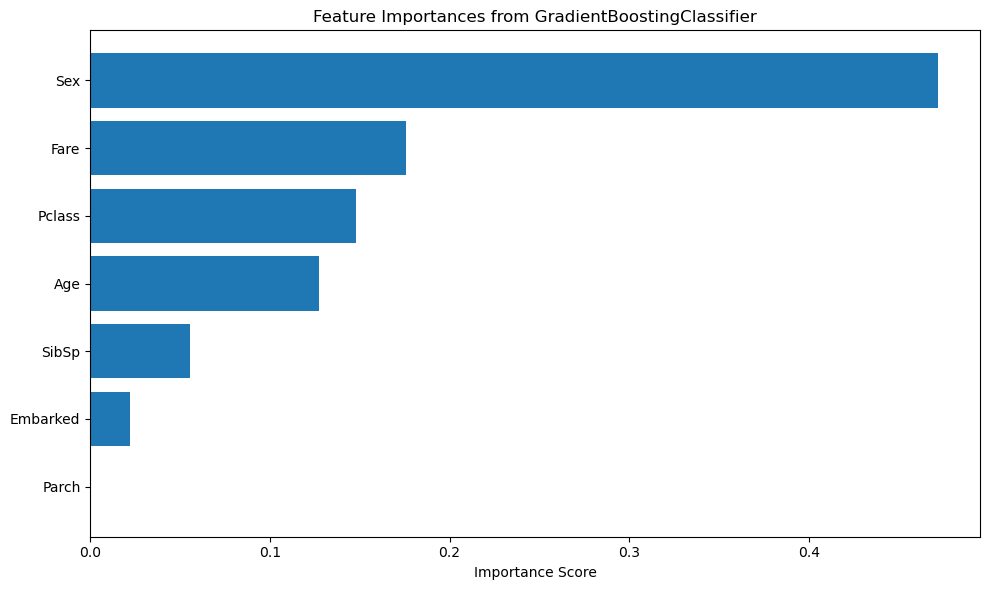

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the trained model
importances = GB_model.feature_importances_

# Get feature names from the training set
feature_names = x_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the top features
print("Top Important Features:")
print(feature_importance_df.head())

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()  # Most important at the top
plt.xlabel('Importance Score')
plt.title('Feature Importances from GradientBoostingClassifier')
plt.tight_layout()
plt.show()


## Result
#### EDA showed that females, children, and first-class passengers had higher survival rates. In contrast, people from larger families and lower classes were less likely to survive.



## Conclusion
#### The analysis revealed strong relationships between survival and features like gender, age, and class. These insights provide a solid foundation for predictive modeling and deeper analysis.